# 📌 Transform: Primeiro Tratar

[Clique para acessar os dados](https://docs.google.com/spreadsheets/d/1YQhDNSt1sOrzq6AKxyYG6wzRAvM-M7l7jJRIHunNB88/copy?gid=1190375422#gid=1190375422)

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_receitas = pd.read_csv('/content/Cópia de Dados - TCC - Planilhas - Receitas.csv')

## 1️⃣ Ao nível de colunas

### 💡 Acessar nomes de coluna

🔹 O que faz?
* Podemos visualizar os nomes das colunas do DataFrame usando
* Quando usar? Para verificar se os nomes das colunas estão corretos ou precisam de ajustes.


In [ ]:
df_receitas.columns

Index(['Data Lançamento', 'Id Atendimento', 'Receita Código',
       'Quantidade Vendida', 'Valor de venda', 'Cliente ID', 'Cliente Sexo',
       'Cliente Nome', 'Cliente Data Nascimento', 'Cliente Origem',
       'Cliente Cidade', 'Profissional Nome', 'Profissional Especialidade',
       'Data de Pagamento', 'Forma Pagamento'],
      dtype='object')

### 💡 Mudar nomes de coluna

🔹 O que faz?
* A função .rename() permite alterar o nome de colunas específicas, sem modificar o restante.

In [ ]:
#permite passar um dicionário que atribue a cada coluna existente um novo nome

df_receitas = df_receitas.rename(columns={
    'Data Lançamento': 'data_lancamento',
    'Id Atendimento': 'atendimento_id',
    'Receita Código': 'receita_codigo',
    'Quantidade Vendida': 'venda_quantidade',
    'Valor de venda': 'venda_valor',
    'Cliente ID': 'cliente_id',
    'Cliente Sexo': 'cliente_sexo',
    'Cliente Nome':'cliente_nome',
    'Cliente Data Nascimento': 'cliente_nascimento_data',
    'Cliente Origem': 'cliente_origem',
    'Cliente Cidade': 'cliente_cidade',
    'Profissional Nome': 'profissional_nome',
    'Profissional Especialidade': 'profissional_especialidade',
    'Data de Pagamento': 'pagamento_data',
    'Forma Pagamento':'pagamento_forma'
    })

In [ ]:
df_receitas.columns

Index(['data_lancamento', 'atendimento_id', 'receita_codigo',
       'venda_quantidade', 'venda_valor', 'cliente_id', 'cliente_sexo',
       'cliente_nome', 'cliente_nascimento_data', 'cliente_origem',
       'cliente_cidade', 'profissional_nome', 'profissional_especialidade',
       'pagamento_data', 'pagamento_forma'],
      dtype='object')

🔹 Se quisermos alterar todos os nomes de uma vez, podemos usar a atribuição do nome das colunas, com df.columns = [...], mas tem que usar na mesma sequência da ordem atual das colunas

In [ ]:
#Usar a identação é uma boa prática

df_receitas.columns = ['data_lancamento',
                       'atendimento_id',
                       'receita_codigo',
                       'venda_quantidade',
                       'venda_valor',
                       'cliente_id',
                       'cliente_sexo',
                       'cliente_nome',
                       'cliente_nascimento_data',
                       'cliente_origem',
                       'cliente_cidade',
                       'profissional_nome',
                       'profissional_especialidade',
                       'pagamento_data',
                       'pagamento_forma'
                       ]

🔹 Se os nomes das colunas estiverem inconsistentes, podemos formatá-los automaticamente para minúsculo

In [ ]:
#df.columns = df.columns.str.lower()

🔹 Ou, se quisermos remover espaços e deixar padronizado:

In [ ]:
#df_receitas.columns = df_receitas.columns.str.strip().str.replace(" ", "_")

### 💡 Colocar a tipologia da coluna

Em planilhas, a alteração é com mouse (low-code, lembra da nossa aula de ferramentas?) Aqui é com o teclado

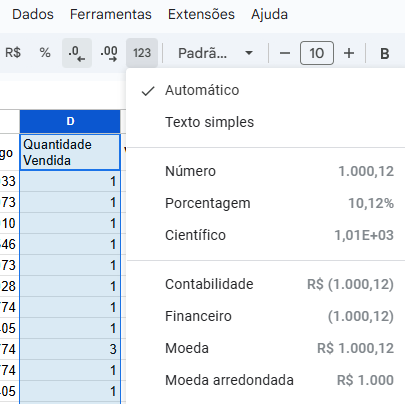

🔹 Ao trabalhar com dados, nem sempre as colunas vêm com o tipo correto. Por isso, é essencial converter os tipos das colunas para garantir análises e cálculos corretos.

🔹 Se uma coluna que deveria ser string foi carregada como número, podemos convertê-la usando a função astype

In [ ]:
df_receitas['atendimento_id'] = df_receitas['atendimento_id'].astype(str)

In [ ]:
# Converter tipo de dados de colunas
df_receitas['atendimento_id'] = df_receitas['atendimento_id'].astype(str) #Exemplo para string
df_receitas['receita_codigo'] = df_receitas['receita_codigo'].astype(str) #Exemplo para string
df_receitas['cliente_id'] = df_receitas['cliente_id'].astype(str) #Exemplo para string

🔹 Colunas de data muitas vezes são carregadas como object (texto), o que impede operações como cálculos de tempo. Por isso tem que ser convertidas usando a função to_datetime. É interessante usar parâmetros para forçar o formato e lidar com erros

In [ ]:
# Converter a coluna 'data_lancamento' para o tipo datetime
df_receitas['data_lancamento'] = pd.to_datetime(df_receitas['data_lancamento'], format='%Y/%m/%d', errors='coerce')

# Converter a coluna 'cliente_nascimento_data' para o tipo datetime
df_receitas['cliente_nascimento_data'] = pd.to_datetime(df_receitas['cliente_nascimento_data'], format='%Y/%m/%d', errors='coerce')

# Converter a coluna 'pagamento_data' para o tipo datetime
df_receitas['pagamento_data'] = pd.to_datetime(df_receitas['pagamento_data'], format='%Y/%m/%d', errors='coerce')

[Clique para ver a documentação](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html)

### 💡 Mudar ordem das colunas

A ordem das colunas pode influenciar na organização e visualização dos dados. Em planilhas, a alteração é com mouse, basta arrastar (low-code, lembra da nossa aula de ferramentas?) Aqui é com o teclado high-code)!





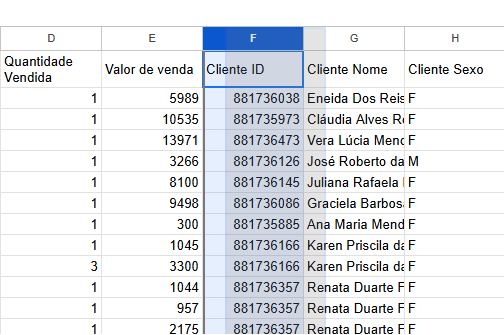

🔹 No Pandas, podemos facilmente alterar a ordem das colunas para facilitar a análise.



🔹 Antes de reordenar, é útil verificar a ordem atual:

In [ ]:
df_receitas.columns

Index(['data_lancamento', 'atendimento_id', 'receita_codigo',
       'venda_quantidade', 'venda_valor', 'cliente_id', 'cliente_sexo',
       'cliente_nome', 'cliente_nascimento_data', 'cliente_origem',
       'cliente_cidade', 'profissional_nome', 'profissional_especialidade',
       'pagamento_data', 'pagamento_forma'],
      dtype='object')

🔹 Podemos definir uma nova ordem das colunas especificando a sequência desejada:

In [ ]:
df_receitas = df_receitas[[
    "atendimento_id", "data_lancamento", "receita_codigo",
    "venda_quantidade", "venda_valor", "cliente_id", "cliente_sexo","cliente_nome",
    "cliente_nascimento_data", "cliente_origem",
    "cliente_cidade", "profissional_nome", "profissional_especialidade",
    "pagamento_data", "pagamento_forma"
]]

In [ ]:
df_receitas.columns

Index(['atendimento_id', 'data_lancamento', 'receita_codigo',
       'venda_quantidade', 'venda_valor', 'cliente_id', 'cliente_sexo',
       'cliente_nome', 'cliente_nascimento_data', 'cliente_origem',
       'cliente_cidade', 'profissional_nome', 'profissional_especialidade',
       'pagamento_data', 'pagamento_forma'],
      dtype='object')

🔹 Se quisermos organizar automaticamente as colunas em ordem alfabética:

In [ ]:
#df_receitas = df_receitas[sorted(df_receitas.columns)]

### 💡 Descartando uma coluna desnecessária

Em planilhas, a alteração é com mouse, basta clicar com o botão direito (low-code, lembra da nossa aula de ferramentas?) Aqui é com o teclado high-code)!

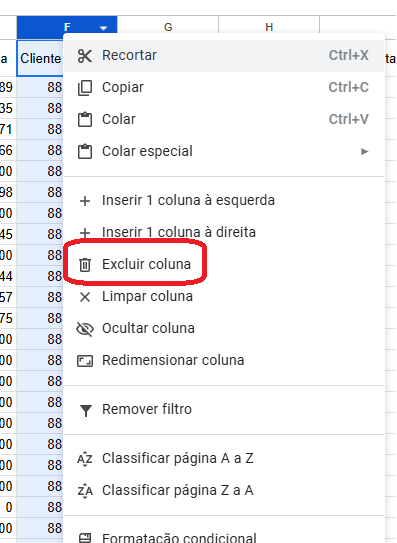

🔹 Em python, é possível descartar uma coluna simplesmente usando a atribuição anterior, deixando uma coluna de fora

🔹 Mas existem outras forma, usando a função drop(), especificando o nome da coluna

In [ ]:
df_receitas = df_receitas.drop(columns=["cliente_cidade"])

🔹 Se verificarmos com .columns, veremos que a coluna simplemente sumiu

In [ ]:
df_receitas.columns

Index(['atendimento_id', 'data_lancamento', 'receita_codigo',
       'venda_quantidade', 'venda_valor', 'cliente_id', 'cliente_sexo',
       'cliente_nome', 'cliente_nascimento_data', 'cliente_origem',
       'profissional_nome', 'profissional_especialidade', 'pagamento_data',
       'pagamento_forma'],
      dtype='object')

🔹 Se quiser jogar fora mais de uma coluna ao mesmo tempo, basta passar como parâmetro.

In [ ]:
df_receitas = df_receitas.drop(columns=["profissional_nome", "cliente_nome"])

🔹 Se não quisermos reatribuir o DataFrame (df_receitas = ...), podemos usar o parâmetro inplace=True. No entanto, cuidado com a sequência de aplicação (a sequência da receita importa!), porque você pode estar pedindo para jogar fora algo que já o foi

In [ ]:
df_receitas = df_receitas.drop(columns=["profissional_nome", "cliente_nome"], inplace=True)

KeyError: "['profissional_nome', 'cliente_nome'] not found in axis"

### 💡 Descartando uma coluna com nulidade

🔹 É possível descartar uma coluna com todos ou algum valor nulo, utlizando a função dropna()

In [ ]:
# axis = 1 identifica para dropar colunas
# how identifica o critério de nulidade

df_receitas = df_receitas.dropna(axis=1, how="all")

[Clique para ver documentação](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)